# ARIM情報活用講座：　メトリックス 編　
# XRD編

## データセット
高エネルギー加速器研究機構（ＫＥＫ） 物質構造科学研究所 量子ビーム連携研究センターの小野 寛太准教授、総合研究大学院大学 高エネルギー加速器科学研究科　鈴木雄太（博士後期課程２年）らの研究グループは、統計数理研究所、東京理科大学と共同で、物質・材料の構造評価に不可欠な計測データである粉末Ｘ線回折パターンから機械学習を用いて結晶の対称性を予測する手法を開発しました。

さらに機械学習モデルの解析を通じて、これまで明示されていなかった「粉末Ｘ線回折パターンを見ただけでおおよその対称性を推定できる熟練者の経験知」を定式化することに成功しました。この研究で用いた解釈可能な機械学習アプローチにより、熟練者の勘・コツのように研究者間で漠然と共有されていた経験的知識を、計測データの中から発見し定式化することが可能となります。それにより、定式化された知識を用いて誰でも熟練者並みの計測データ解析を効率的に行えるようになり、科学研究を加速することが期待されます。

https://www.jst.go.jp/pr/announce/20201211/index.html

---

---


# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!git clone https://github.com/ARIM-Training/Training_python_9.git
%cd Training_python_9

### 汎用ライブラリのインポート

In [3]:
import os
import itertools
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

random_state = 42

## 1.分子構造データの読み込み
### データセットファイルの読み込み
本コードではすでに訓練データ（train.csv）と検証データ（test.csv）とで分けられて提供されています。それぞれを`read_csv()`メソッドで読み込みます。

訓練データは123,495化合物、検証データは46,068化合物からなるデータセットで、いずれも23列の変数からなるデータであることを確認してください。

In [4]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [5]:
train_data

,1,2,3,4,5,6,7,8,9,10,...,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10
0,12.800197,14.940639,17.394581,18.505399,18.670426,20.689381,20.721964,21.964808,23.583201,23.846828,...,0.908513,1.059634,1.232431,1.310470,1.322053,1.463536,1.465816,1.552683,1.665523,1.683873
1,16.166407,16.435808,20.174793,22.512152,23.360235,24.111671,25.403932,25.975734,26.334719,28.176936,...,1.146014,1.164981,1.427516,1.590881,1.649996,1.702299,1.792073,1.831724,1.856594,1.983930
2,14.330435,15.183582,16.201044,19.282158,20.098901,23.758891,23.918898,25.133432,25.831712,27.093006,...,1.016587,1.076764,1.148453,1.364967,1.422202,1.677753,1.688888,1.773300,1.821741,1.909068
3,8.402510,15.542676,16.850628,18.598695,20.147478,20.727534,21.372799,24.718322,25.392239,25.669955,...,0.597087,1.102075,1.194174,1.317019,1.425604,1.466205,1.511327,1.744471,1.791261,1.810526
4,12.409748,12.896543,14.923789,14.988381,16.557540,17.135276,17.988328,19.821608,19.853406,20.744413,...,0.880910,0.915322,1.058446,1.063001,1.173550,1.214197,1.274159,1.402778,1.405006,1.467386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123490,4.252578,6.524910,7.675210,7.904897,7.917210,8.099011,8.511026,8.710852,8.775068,9.261263,...,0.302392,0.463829,0.545486,0.561784,0.562658,0.575557,0.604784,0.618957,0.623511,0.657984
123491,12.370783,14.227841,14.250853,14.402265,15.956775,17.596024,20.189999,20.298278,20.314587,21.456334,...,0.878155,1.009347,1.010971,1.021656,1.131250,1.246592,1.428581,1.436162,1.437304,1.517165
123492,12.441538,13.053416,15.960236,17.284801,17.836629,18.298043,18.599645,19.158797,20.741634,24.022378,...,0.883158,0.926408,1.131494,1.224713,1.263501,1.295912,1.317086,1.356316,1.467192,1.696088
123493,11.774650,13.118463,14.664374,14.867687,15.526205,16.282269,16.787787,18.945258,21.943822,22.143109,...,0.835991,0.931005,1.040149,1.054489,1.100915,1.154172,1.189753,1.341338,1.551217,1.565130


In [6]:
test_data

,1,2,3,4,5,6,7,8,9,10,...,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10
0,16.079736,18.962396,19.301074,23.596108,25.932809,29.545382,29.832157,30.054535,32.487494,34.709363,...,1.139910,1.342540,1.366293,1.666422,1.828749,2.078189,2.097905,2.113184,2.279821,2.431103
1,7.827822,16.341903,19.501959,20.206029,21.307253,21.849118,23.632370,23.702233,26.386061,26.482859,...,0.556315,1.158370,1.380377,1.429704,1.506746,1.544604,1.668946,1.673809,1.860150,1.866852
2,10.103425,12.998544,16.960672,19.376093,19.780177,20.286479,24.075257,26.168220,26.558798,27.453386,...,0.717668,0.922531,1.201916,1.371553,1.399875,1.435336,1.699766,1.845062,1.872109,1.933977
3,18.230528,19.749320,21.534168,29.654678,31.595049,35.032291,35.884212,36.944127,37.537735,40.117902,...,1.291171,1.397713,1.522604,2.085705,2.218811,2.453016,2.510730,2.582341,2.622351,2.795426
4,13.002431,18.304462,18.550961,22.313316,22.720259,26.176149,29.171744,29.489882,31.835827,32.276263,...,0.922805,1.296362,1.313668,1.577009,1.605395,1.845611,2.052482,2.074372,2.235285,2.265393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46063,4.636163,9.279936,13.939044,16.705221,17.345495,18.621440,19.142042,21.821121,23.335440,23.501696,...,0.329654,0.659308,0.988961,1.183943,1.228980,1.318615,1.355141,1.542649,1.648269,1.659848
46064,12.550223,21.825920,25.254231,26.979420,31.634941,33.618619,34.155881,37.288681,38.283651,38.764600,...,0.890842,1.542984,1.781685,1.901213,2.221541,2.356947,2.393501,2.605573,2.672527,2.704819
46065,11.485693,16.270655,23.088850,24.385756,25.858715,32.499007,32.881452,33.830917,34.575893,34.938212,...,0.815545,1.153354,1.631089,1.721358,1.823613,2.280607,2.306708,2.371397,2.422040,2.446634
46066,11.449738,16.219549,23.015827,24.292561,25.776645,32.345782,32.775965,33.710381,34.418218,34.825715,...,0.813000,1.149756,1.626000,1.714879,1.817923,2.270142,2.299512,2.363194,2.411330,2.439000


## 2.機械学習モデル
### データセットの分割（Data set splitting）
次に説明変数と目的変数の設定になります。結晶系および空間群の予測モデルを検討するため、それぞれの目的変数を設定します。
* 結晶系分類：　'crystal_system'を目的変数とします。
* 空間群分類：　'sg_num'を目的変数とします。

また、説明変数は低角側から上位10ピークの回折角のほかピーク数（peaknum）とします。

In [7]:
# 結晶系分類のデータ分割
y_train_c_sys = train_data['crystal_system']
y_test_c_sys = test_data['crystal_system']

#空間群分類のデータ分割
y_train_sgr = train_data['sg_num']
y_test_sgr = test_data['sg_num']

X_train = train_data[[str(i) for i in range(1, 11)] + ['peaknum']]
X_test = test_data[[str(i) for i in range(1, 11)] + ['peaknum']]

classnames = ['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']
sgr_nums = np.array(list(set(y_train_sgr)))

In [8]:
X_train

,1,2,3,4,5,6,7,8,9,10,peaknum
0,12.800197,14.940639,17.394581,18.505399,18.670426,20.689381,20.721964,21.964808,23.583201,23.846828,399
1,16.166407,16.435808,20.174793,22.512152,23.360235,24.111671,25.403932,25.975734,26.334719,28.176936,195
2,14.330435,15.183582,16.201044,19.282158,20.098901,23.758891,23.918898,25.133432,25.831712,27.093006,253
3,8.402510,15.542676,16.850628,18.598695,20.147478,20.727534,21.372799,24.718322,25.392239,25.669955,369
4,12.409748,12.896543,14.923789,14.988381,16.557540,17.135276,17.988328,19.821608,19.853406,20.744413,493
...,...,...,...,...,...,...,...,...,...,...,...
123490,4.252578,6.524910,7.675210,7.904897,7.917210,8.099011,8.511026,8.710852,8.775068,9.261263,4885
123491,12.370783,14.227841,14.250853,14.402265,15.956775,17.596024,20.189999,20.298278,20.314587,21.456334,375
123492,12.441538,13.053416,15.960236,17.284801,17.836629,18.298043,18.599645,19.158797,20.741634,24.022378,430
123493,11.774650,13.118463,14.664374,14.867687,15.526205,16.282269,16.787787,18.945258,21.943822,22.143109,573


### 機械学習モデルの構築

事前にモデル検討を行われた結果、ベストモデルは、ExtraTrees（Extremely Randomized Trees）としています。の略称です。scikit-learnのライブラリではsklearn.ensembleモジュールにある`ExtraTreesClassifier()`より走らせることができます。名前の通り、ベースとなる決定木に基づくアンサンブル学習方法です。

結晶系におけるモデル化

In [11]:
# Training crystal system classifier

model_sys = ExtraTreesClassifier(n_estimators=500, 
                            max_depth=30, 
                            max_features=9, 
                            n_jobs=-1, 
                            random_state=random_state,
                            warm_start=False)

model_sys.fit(X_train, y_train_c_sys)

ExtraTreesClassifier(max_depth=30, max_features=9, n_estimators=500, n_jobs=-1,
                     random_state=42)

In [12]:
# validation
y_pred = model_sys.predict(X_test)
print('mean accuracy of crystal system prediction: ', metrics.accuracy_score(y_test_c_sys, y_pred)*100)

mean accuracy of crystal system prediction:  92.23539116089259


空間群におけるモデル化

In [13]:
# Training space group classifier

model_sgr = ExtraTreesClassifier(n_estimators=50, 
                                n_jobs=-1, 
                                max_depth=25, 
                                max_features=None, 
                                random_state=random_state
                               )
model_sgr.fit(X_train, y_train_sgr)

ExtraTreesClassifier(max_depth=25, max_features=None, n_estimators=50,
                     n_jobs=-1, random_state=42)

In [14]:
# validation
y_pred = model_sgr.predict(X_test)
print('mean accuracy of space group prediction: ', metrics.accuracy_score(y_test_sgr, y_pred)*100)

mean accuracy of space group prediction:  80.2031779109143


### 分類結果の保存

In [17]:
# saveing prediction results (if needed)
test_pred = pd.DataFrame()

test_pred['crystal_system_pred'] = model_sys.predict(X_test)
test_pred['sg_num_pred'] = model_sgr.predict(X_test)

test_pred['sg_num_true'] = test_data['sg_num']
test_pred['crystal_system_true'] = test_data['crystal_system']

test_pred.to_csv('pred_result_test.csv', index=False)

### 混同行列による確認（空間群）

C:\Users\Matsunami\AppData\Local\Temp\ipykernel_21768\2058633324.py:29: RuntimeWarning: invalid value encountered in divide
  cnf_matrix_norm = cnf_matrix / cnf_matrix.sum(axis=1)[:, np.newaxis]


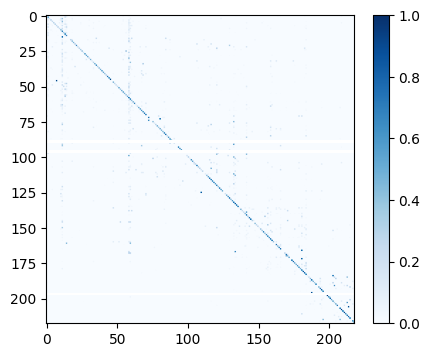

In [18]:
# Plotting a confusion matrix for space group

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_test_sgr, y_pred)
cnf_matrix_norm = cnf_matrix / cnf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5,4), dpi=100)
plt.imshow(cnf_matrix_norm, cmap=plt.cm.Blues)
plt.colorbar()

### 検証
外れ値の大きかった空間群139および167について検証します。

In [33]:
# Miss-prediction analysis: space group 139
u, counts = np.unique(y_pred[y_test_sgr==139], return_counts=True)
print(f'predicted space groups (top5): {u[counts.argsort()[::-1]][:5]}')
print(f'counts: {np.sort(counts)[::-1][:5]}')

predicted space groups (top5): [139 107  87 123 194]
counts: [1496   17   16   14    8]


In [34]:
# Miss-prediction analysis: space group 167
u, counts = np.unique(y_pred[y_test_sgr==167], return_counts=True)
print(f'predicted space groups (top5): {u[counts.argsort()[::-1]][:5]}')
print(f'counts: {np.sort(counts)[::-1][:5]}')

predicted space groups (top5): [167 161  12 136  62]
counts: [585  18  11   6   5]


【解説】以下はオリジナルのコードではありませんが、結晶系における混同行列の可視化となります。

In [31]:
# model evaluation

test_pred['crystal_system_pred'] = model_sys.predict(X_test)


conf_mat = confusion_matrix(y_true=test_data['crystal_system'], y_pred=test_pred['crystal_system_pred'])

print(conf_mat)

[[  668   634    53     8     6    19    15]
 [  197  5092   574    24     4     3     1]
 [   25   528  6935   171    18    36     6]
 [    2    17   265  5519    43    57    46]
 [    0    13    90    89  3108   131   101]
 [    0     9    57   108   142  5754    23]
 [    4     3     6    33     8     8 15415]]


C:\Users\Matsunami\AppData\Local\Temp\ipykernel_21768\1497480353.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classname, rotation=90)
C:\Users\Matsunami\AppData\Local\Temp\ipykernel_21768\1497480353.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classname)


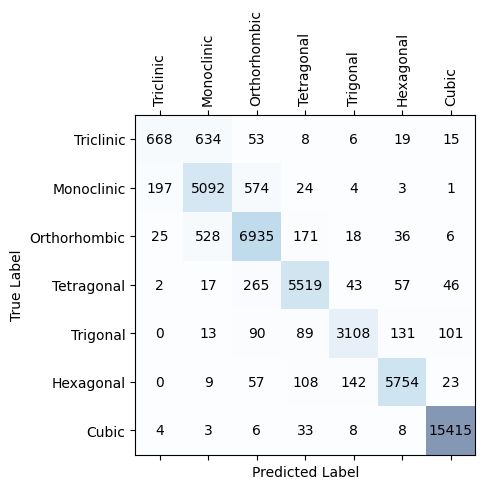

In [32]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=.5)

classname = ['','Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

ax.set_xticklabels(classname, rotation=90)
ax.set_yticklabels(classname)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j,y=i,s=conf_mat[i,j],va='center',ha='center')
        
plt.tight_layout()

## 3.結晶系/空間群の予測
ここでは訓練されたExtraTreesClassifierを用いて空間群と結晶系を予測することができます。  
* XRDパターンで予測する場合、$Q (Å^{-1})$ の最低角度から10個のピーク位置のリストを `input_xrd_Q` として提供してください。 
* XRDのピーク数が10に満たない場合は、[0.81, 0.92, 0.99, 0, 0, 0, 0, 0, 0]`のように0を記入してください。




Example:
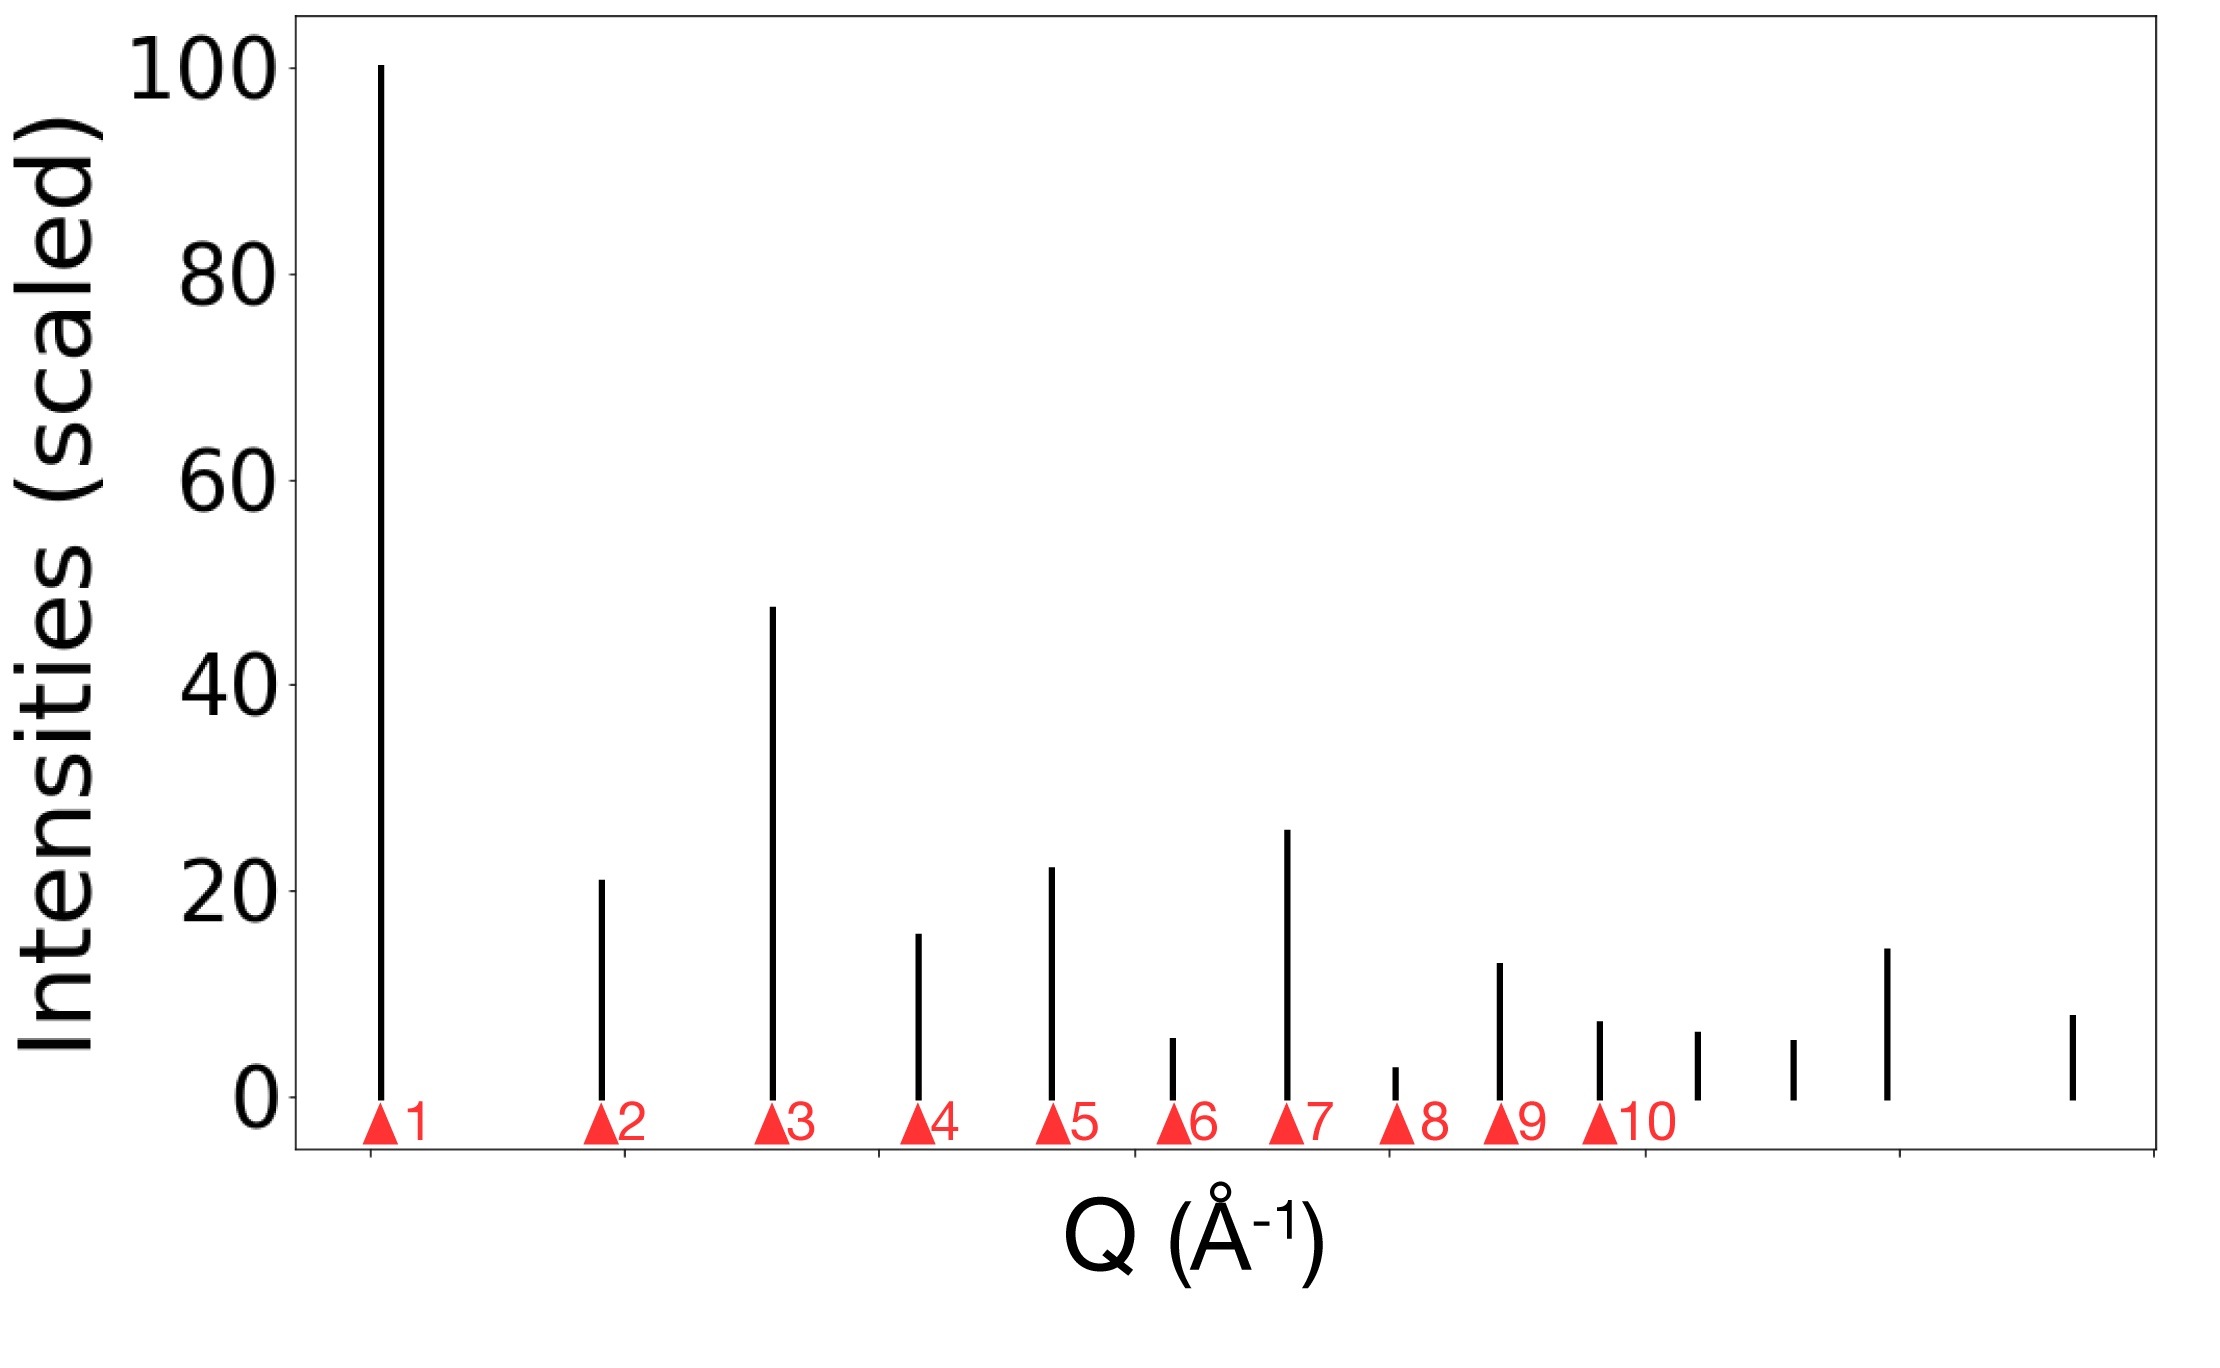

In [35]:
# Retraining models to predict without the feature of the number of peaks
# This may take couple of minutes.

X_train = train_data[['q_{}'.format(i) for i in range(1, 11)]]
X_test = test_data[['q_{}'.format(i) for i in range(1, 11)]]

model_sys.fit(X_train, y_train_c_sys)
y_pred = model_sys.predict(X_test)
print('mean accuracy of crystal system prediction: ', metrics.accuracy_score(y_test_c_sys, y_pred)*100)

model_sgr.fit(X_train, y_train_sgr)
y_pred = model_sgr.predict(X_test)
print('mean accuracy of space group prediction: ', metrics.accuracy_score(y_test_sgr, y_pred)*100)

mean accuracy of crystal system prediction:  90.17756360163237
mean accuracy of space group prediction:  78.0910827472432


In [36]:
# preparing the data and prediction

def twotheta_to_q(two_theta, wavelength = 1.54184):
    q = 4*np.pi*(np.sin(np.deg2rad(two_theta/2)))/wavelength
    return q

input_xrd_2T =[13.188150, 16.194180, 16.761641, 18.773069, 19.228790, 23.013981, 25.197500, 25.270580, 26.545000, 26.581079]
input_xrd_Q = np.array(list(map(twotheta_to_q, input_xrd_2T))) # 2theta in CuKa -> Q

# This XRD is taken from Table S3 in Park, W. B. et al. IUCrJ 4, 486–494 (2017).
# https://doi.org/10.1107/S205225251700714X
# The ground truth is orthorhombic system in the A21am (No. 36) space group.

In [37]:
# prediction
classnames = ['Triclinic', 'Monoclinic', 'Orthorhombic', 'Tetragonal', 'Trigonal', 'Hexagonal', 'Cubic']

print('Predicted crystal system: ', classnames[model_sys.predict(input_xrd_Q.reshape(1, -1))[0]])
print('Predicted space group: ', model_sgr.predict(input_xrd_Q.reshape(1, -1)))

C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Predicted crystal system:  Orthorhombic
Predicted space group:  [36]


C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


### 空間群の候補の表示

C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


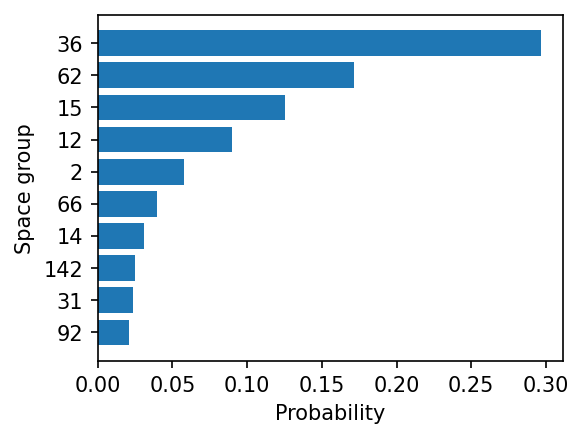

In [38]:
# Checking predicted top 10 candidates and probability.

sg_pred_proba = model_sgr.predict_proba(input_xrd_Q.reshape(1, -1))
sgr_pred_top10_idx = np.argsort(-sg_pred_proba).squeeze()[:10]

plt.figure(figsize=(4,3), dpi=150)
plt.barh(sgr_nums[sgr_pred_top10_idx].astype(str)[::-1], 
         sg_pred_proba[0, sgr_pred_top10_idx][::-1])
plt.xlabel("Probability");
plt.ylabel("Space group");

## 4.実際の実験データによる評価
今回のラウンドロビンでは、Sample1-3を使用しました： 
- Structure Determination by Powder Diffractometry Round Robin - 2  
Organized by : A. Le Bail and L.M.D Cranswick  
  - http://www.cristal.org/sdpdrr2/

Peak list in 2Theta:  [13.18815, 16.19418, 16.761641, 18.773069, 19.22879, 23.013981, 25.1975, 25.27058, 26.545, 26.581079]
Peak list in Q:  [0.84839556 0.94375999 0.96572735 1.10660815 1.21621764 1.26900741
 1.28544486 1.47190449 1.64301398 1.66871147]
Predicted crystal system:  Monoclinic
Predicted space group:  [14]


C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


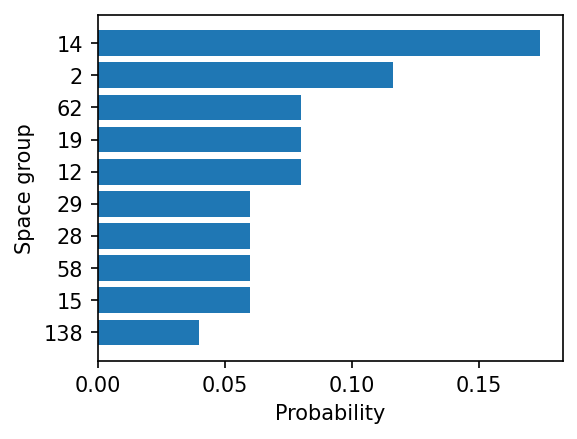

In [39]:
# Sample1

# def twotheta_to_q(two_theta, wavelength = 1.54184):
#     q = 4*np.pi*(np.sin(np.deg2rad(two_theta/2)))/wavelength
#     return q
# sample1 = pd.read_csv('/content/peaklist/powdx_p1.txt', sep=' ', skipinitialspace=True)
# sample1['2Theta'].astype('float')
# input_xrd_2T =sample1['2Theta'][:10].values
# input_xrd_Q = np.array(list(map(twotheta_to_q, sample1['2Theta'][:10]))) # 2theta in CuKa -> Q

# input_xrd_2T = np.array([11.95, 13.299, 13.61, 15.607, 17.164, 17.915, 18.149, 20.809, 23.26, 23.629])
input_xrd_Q = np.array([0.84839556, 0.94375999, 0.96572735, 1.10660815, 1.21621764, 1.26900741
, 1.28544486, 1.47190449, 1.64301398, 1.66871147])

print('Peak list in 2Theta: ', input_xrd_2T)
print('Peak list in Q: ', input_xrd_Q)

print('Predicted crystal system: ', classnames[model_sys.predict(input_xrd_Q.reshape(1, -1))[0]])
print('Predicted space group: ', model_sgr.predict(input_xrd_Q.reshape(1, -1)))

# Checking predicted top 10 candidates and probability.
sg_pred_proba = model_sgr.predict_proba(input_xrd_Q.reshape(1, -1))
sgr_pred_top10_idx = np.argsort(-sg_pred_proba).squeeze()[:10]

plt.figure(figsize=(4,3), dpi=150)
plt.barh(sgr_nums[sgr_pred_top10_idx].astype(str)[::-1], 
         sg_pred_proba[0, sgr_pred_top10_idx][::-1])
plt.xlabel("Probability");
plt.ylabel("Space group");

Peak list in Q:  [0.58362101 0.65780434 0.74323434 0.83413412 0.9628833  1.01022197
 1.06783925 1.07113124 1.16328737 1.16712636]
Predicted crystal system:  Orthorhombic
Predicted space group:  [2]


C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


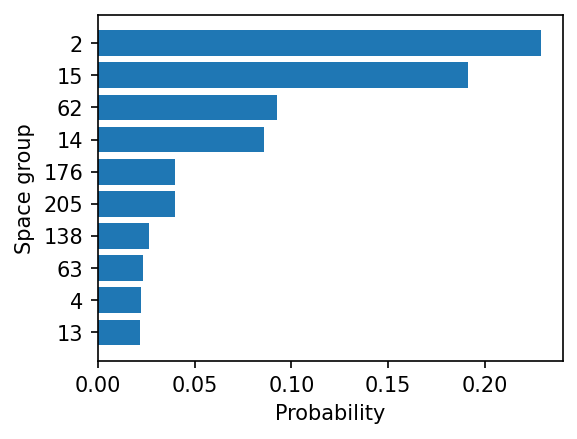

In [42]:
# Sample2

# def twotheta_to_q(two_theta, wavelength = 0.79764):
#     q = 4*np.pi*(np.sin(np.deg2rad(two_theta/2)))/wavelength
#     return q
# sample2 = pd.read_csv('/content/peaklist/powdx_p2.txt', sep=' ', skipinitialspace=True)
# sample2['2Theta'].astype('float')
# input_xrd_2T =sample2['2Theta'][:10].values
# input_xrd_Q = np.array(list(map(twotheta_to_q, sample2['2Theta'][:10]))) # 2theta -> Q

# input_xrd_2T = np.array([4.246, 4.786, 5.408, 6.07, , 7.008, 7.353, 7.773, 7.797, 8.469, 8.497])
input_xrd_Q = np.array([0.58362101, 0.65780434, 0.74323434, 0.83413412, 0.9628833, 1.01022197
, 1.06783925, 1.07113124, 1.16328737, 1.16712636])

# print('Peak list in 2Theta: ', input_xrd_2T)
print('Peak list in Q: ', input_xrd_Q)

print('Predicted crystal system: ', classnames[model_sys.predict(input_xrd_Q.reshape(1, -1))[0]])
print('Predicted space group: ', model_sgr.predict(input_xrd_Q.reshape(1, -1)))


# Checking predicted top 10 candidates and probability.
sg_pred_proba = model_sgr.predict_proba(input_xrd_Q.reshape(1, -1))
sgr_pred_top10_idx = np.argsort(-sg_pred_proba).squeeze()[:10]

plt.figure(figsize=(4,3), dpi=150)
plt.barh(sgr_nums[sgr_pred_top10_idx].astype(str)[::-1], 
         sg_pred_proba[0, sgr_pred_top10_idx][::-1])
plt.xlabel("Probability");
plt.ylabel("Space group");

Peak list in 2Theta:  [13.18815, 16.19418, 16.761641, 18.773069, 19.22879, 23.013981, 25.1975, 25.27058, 26.545, 26.581079]
Peak list in Q:  [0.46998606 0.66508454 0.81477552 1.05179013 1.15245555 1.24443949
 1.33062717 1.41143455 1.56048596 1.62996852]
Predicted crystal system:  Orthorhombic
Predicted space group:  [12]


C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\Matsunami\anaconda3\envs\ARIM-v2\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


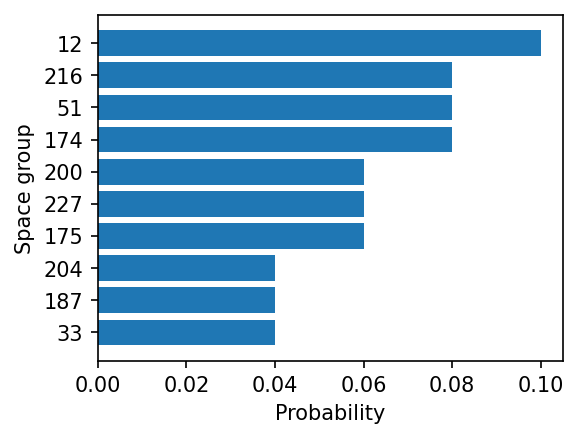

In [41]:
# Sample3

# def twotheta_to_q(two_theta, wavelength = 0.79764):
#     q = 4*np.pi*(np.sin(np.deg2rad(two_theta/2)))/wavelength
#     return q
# sample3 = pd.read_csv('/content/peaklist/powdx_p3.txt', sep=' ', skipinitialspace=True)
# sample3['2Theta'].astype('float')
# input_xrd_2T =sample3['2Theta'][:10].values
# input_xrd_Q = np.array(list(map(twotheta_to_q, sample3['2Theta'][:10]))) # 2theta -> Q

# input_xrd_2T = np.array([3.419, 4.839, 5.929, 7.656, 8.39,  9.061, 9.69, 10.28, 11.369, 11.877])
input_xrd_Q = np.array([0.46998606, 0.66508454, 0.81477552, 1.05179013, 1.15245555, 1.24443949
, 1.33062717, 1.41143455, 1.56048596, 1.62996852])

print('Peak list in 2Theta: ', input_xrd_2T)
print('Peak list in Q: ', input_xrd_Q)

print('Predicted crystal system: ', classnames[model_sys.predict(input_xrd_Q.reshape(1, -1))[0]])
print('Predicted space group: ', model_sgr.predict(input_xrd_Q.reshape(1, -1)))

# Checking predicted top 10 candidates and probability.
sg_pred_proba = model_sgr.predict_proba(input_xrd_Q.reshape(1, -1))
sgr_pred_top10_idx = np.argsort(-sg_pred_proba).squeeze()[:10]

plt.figure(figsize=(4,3), dpi=150)
plt.barh(sgr_nums[sgr_pred_top10_idx].astype(str)[::-1], 
         sg_pred_proba[0, sgr_pred_top10_idx][::-1])
plt.xlabel("Probability");
plt.ylabel("Space group");